In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
# Create a variable to hold the URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a variable to hold the value "metric"
units = "metric"

# Build partial query URL
# <"appid="> is the api_key parameter
# <"&q="> is the query parameter
# <"&units="> is the units parameter
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
# Create a variable to hold a []
lat = []

# Create a variable to hold a []
temp = []

# Loop through the list of cities and perform a request for data on each
# <for city in> for loop iterating each value in 'cities'
for city in cities:

     # <requests.get()> sends an HTTP GET request to the URL specified
    # <.json()> used to parse the JSON content from the HTTP response
    ### and store it as a Python data structure
    response = requests.get(query_url + city).json()

    # accesses the "lat" value within the "coord" dictionary, within the response JSON object
    # <.append()> adds the 'response['coord']['lat']' to the 'lat' []
    lat.append(response['coord']['lat'])

    # <.append()> adds the 'response['main']['temp']' to the 'temp' []
    temp.append(response['main']['temp'])

# <(f" ")> for concatenation
print(f"The latitude information received is: {lat}")

# <(f" ")> for concatenation
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [2.15, 2.18, -6.32, -5.06, 24.99, 24.82, -6.69, 0.93, -2.48, 19.91]


In [13]:
query_url + city

'http://api.openweathermap.org/data/2.5/weather?appid=a2e646057e6a616a5ccdf60228e381ff&units=metric&q=Taipei'

In [5]:
# create a data frame from cities, lat, and temp
# creating a dictionary named 'weather_dict'
# dictionary has three keys: "city," "lat," and "temp,"
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
# <pd.DataFrame()> 
# used to create a pandas DataFrame from the 'weather_dict' {}
# Creates variable 'weather_data'
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,2.15
1,London,51.5085,2.18
2,Oslo,59.9127,-6.32
3,Beijing,39.9075,-5.06
4,Mumbai,19.0144,24.99
5,Manila,14.6042,24.82
6,New York,40.7143,-6.69
7,Seattle,47.6062,0.93
8,Dallas,32.7668,-2.48
9,Taipei,25.0478,19.91


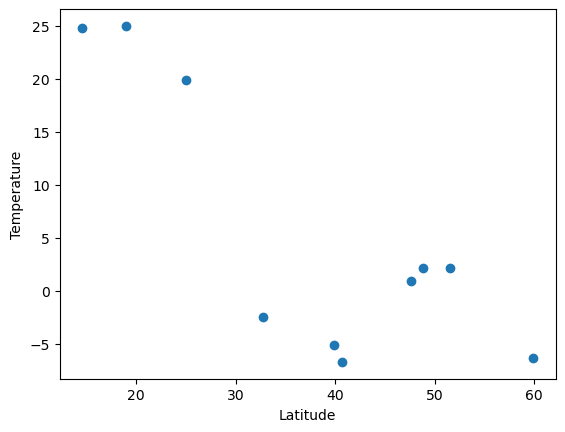

In [6]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']

# <plt.scatter(x,y,marker=)> is used to create a scatter plot.
plt.scatter(x_values,y_values)
# <plt.xlabel()> sets the label for the x-axis
plt.xlabel('Latitude')
# <plt.ylabel()> sets the label for the y-axis
plt.ylabel('Temperature')
# <plt.show()> used to display the plot that you have configured
plt.show()

In [7]:
# Perform a linear regression on temperature vs. latitude
# <stats.linregress()> calculates the least-squares linear regression parameters for a set of data points (x,y)
# <slope> == the slope of the linear regression line
# <intercept> == y-intercept of the linear regression line
# <rvalue> == correlation coefficient between the x and y values
# <pvalue> == the two-tailed p-value for testing the null hypothesis
# <stderr> == the standard error of the estimate for the slope
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
# Creating the slope equation
regress_values = x_values * slope + intercept
print(regress_values)

0    -2.233127
1    -4.109850
2   -10.050253
3     4.090170
4    18.858194
5    21.975488
6     3.519893
7    -1.351559
8     9.137483
9    14.593561
Name: lat, dtype: float64


In [8]:
# Create line equation string
# <round(' ',2)> rounding it to two decimal places
# <str()> convert the value to a string representation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.71x +32.3


The r-value is: 0.6764398485424473


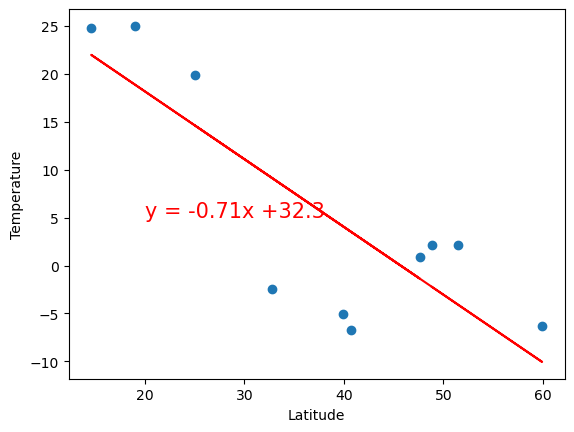

In [9]:
# Create Plot
# <plt.scatter(x,y)> function to create a scatter plot
plt.scatter(x_values,y_values)
# <plt.plot(x,y,style of line)>
# <"r-"> red line with no markers
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
# <plt.xlabel()> sets the label for the x-axis
plt.xlabel('Latitude')
# <plt.ylabel()> sets the label for the y-axis
plt.ylabel('Temperature')
# <plt.annotate(line_eq, (20, 5), fontsize=15, color="red")>
### <(20,5)> specifies  at the point with x-coordinate 20 and y-coordinate 5 on the plot.
### <fontsize=15> font size of the annotation text to 15 pts.
### <color=> specifies the color of the annotation text
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
# <(f" ")> for concatenation
print(f"The r-value is: {rvalue**2}")

# Show plot
# <plt.show()> used to display the plot that you have configured
plt.show()

In [10]:
# Calculate the temperature for Florence at 43.77 degrees
# Create a variable to hold the value "43.77"
florence_lat = 43.77

# <round(' ',2)> rounding it to two decimal places
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
# <(f" ")> for concatenation
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 1.36.


In [11]:
# Use API to determine actual temperature
# <requests.get()> sends an HTTP GET request to the URL specified
# <.json()> used to parse the JSON content from the HTTP response
### and store it as a Python data structure
response = requests.get(query_url + "Florence").json()

# Accesses the 'temp' value within 'main' within the response data 
florence_actual_temp = response['main']['temp']

# <(f" ")> for concatenation
print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 13.93
